## Parametriranje PID regulatora po Cohen - Coon metodi

In [1]:
# priprema okruženja
%matplotlib widget
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import control
import ipywidgets as ipw

In [3]:
# model procesa kojeg reguliramo
def create_model():
    model = control.tf([2], [1, 1])
    model = model*model*model
    return model

Gp = create_model()
print("Gp =\n{}".format(Gp))


Gp =

          8
---------------------
s^3 + 3 s^2 + 3 s + 1



In [4]:
# modeli kontrolera
def P_regulator(Kp):
    return control.tf([Kp], [1])

def PI_regulator(Kp, Ti):
    return control.tf([Kp*Ti, Kp], [Ti, 0])

def PID_regulator(Kp, Ti, Td):
    return control.tf([Kp*Ti*Td, Kp*Ti, Kp], [Ti, 0])

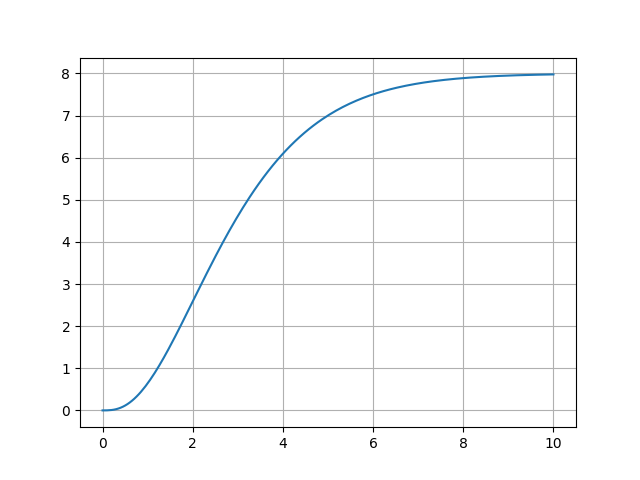

In [5]:
# Odziv procesa u otvorenoj petlji
T = np.linspace(0, 10, 200)
tout,yout = control.step_response(Gp, T)

fig = plt.figure()
fig.set_label('Odziv procesa na skokovitu pobudu')

plt.plot(tout,yout)
plt.grid()
plt.show()


In [6]:
# Iz odziva je potrebno procijeniti parametre
gp = 8  # pojacanje procesa
tao = 3.2 # vremenska konstanta procesa
td = 1.0    # vremensko kasnjenje procesa

K = 0.67/gp * (tao/td+0.185)
Ti = 2.5*td*(tao+0.185*td)/(tao+0.611*td)
Td = 0.37*td*tao/(tao+0.185*td)
print("K={}, Ti={}, Td={}".format(K, Ti, Td))

Gr = PID_regulator(K, Ti, Td)

K=0.28349375000000004, Ti=2.2205457885069535, Td=0.34977843426883304


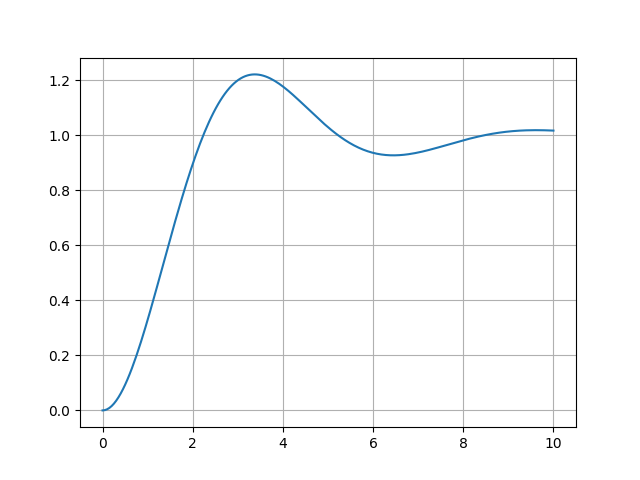

In [7]:
Gz = control.feedback(Gr*Gp)

T = np.linspace(0, 10, 200)
tout,yout = control.step_response(Gz, T)
# vremenski odziv
fig = plt.figure()
fig.set_label('Odziv prijenosne funkcije na skokovitu pobudu')

plt.plot(tout,yout)
plt.grid()
plt.show()